# Mie Scattering Efficiencies

** Scott Prahl**

** 26 Aug 2017, Version 2**

In [1]:
# Execute this cell first
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# if miepython is missing, do `pip install miepython`
import miepython as mp

# Mie Scattering

When a monochromatic plane wave is incident on a sphere, it scatters and absorbs light depending on the properties of the light and sphere.  The sphere has radius $r$ and index of refraction $m=m_\mathrm{re}- j\,m_\mathrm{im}$.  The sphere size parameter $x=2\pi x/\lambda$ where $\lambda$ is the wavelength of the plane wave in a vacuum.

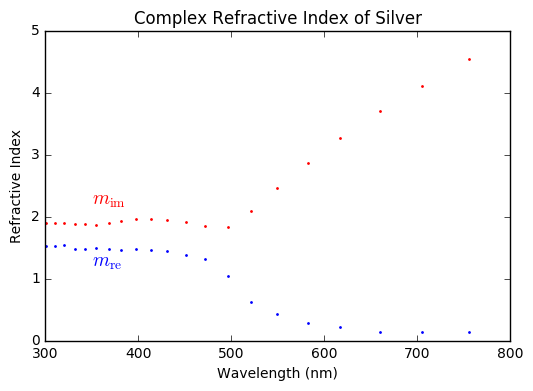

In [5]:
# import the Johnson and Christy data for silver
ag = np.genfromtxt('https://refractiveindex.info/data_txt.php?datafile=main/Ag/Johnson.yml', delimiter='\t')

# data is stacked so need to rearrange
N = len(ag)//2
ag_lam = ag[1:N,0]
ag_mre = ag[1:N,1]
ag_mim = ag[N+1:,1]

plt.scatter(ag_lam*1000,ag_mre,s=1,color='blue')
plt.scatter(ag_lam*1000,ag_mim,s=1,color='red')
plt.xlim(300,800)
plt.ylim(0,5)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive Index')
plt.annotate(r'$m_\mathrm{re}$', xy=(350,1.2),color='blue', fontsize=14)
plt.annotate(r'$m_\mathrm{im}$', xy=(350,2.2),color='red', fontsize=14)

plt.title('Complex Refractive Index of Silver')

plt.show()

# Cross Sections

The geometric cross section of a sphere of radius $r$ is just
$$
G = \pi r^2
$$
The scattering cross section $\sigma_\mathrm{sca}$ is area of a the incident plane wave that results in scattered light.  

Since some of the incident light may be absorbed (i.e., $m_\mathrm{im}>0$) then there is also an area of the incident wave that is absorbed $\sigma_\mathrm{abs}$.  Finally, the total extinction cross section is just the sum of both
$$
\sigma_\mathrm{ext} = \sigma_\mathrm{abs}+\sigma_\mathrm{sca}
$$

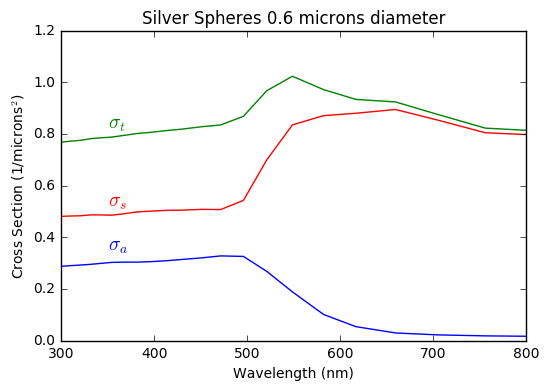

In [15]:
r = 0.3  #radius in microns

x = 2*np.pi*r/ag_lam;
m = ag_mre - 1.0j * ag_mim
qext, qsca, qback, g = mp.mie(m,x)
absorb  = (qext - qsca) * np.pi * r**2
scatt   = qsca * np.pi * r**2
extinct = qext* np.pi * r**2

plt.plot(ag_lam*1000,absorb,color='blue')
plt.plot(ag_lam*1000,scatt,color='red')
plt.plot(ag_lam*1000,extinct,color='green')
plt.annotate(r'$\sigma_a$', xy=(350,0.35), color='blue', fontsize=14)
plt.annotate(r'$\sigma_s$', xy=(350,0.52), color='red', fontsize=14)
plt.annotate(r'$\sigma_t$', xy=(350,0.82), color='green', fontsize=14)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Cross Section (1/microns$^2$)")
plt.title("Silver Spheres 0.6 microns diameter")
plt.xlim(300,800)
plt.show()

The scattering cross section may be related to the transmission of a beam 
through a dispersion of scatterers of equal size.  For $\rho$ particles per
unit volume, the attenuation due to scattering is
$$
-{dI\over dx} = \rho \sigma_{\hbox{sca}} I
$$
The transmission is
$$
T = I/I_0 = \exp(-\rho \sigma_{\hbox{sca}} x) = \exp(-\mu_s x)
$$
or
$$
\mu_s = \rho \sigma_{\hbox{sca}} = \rho \pi r_0^2 Q_{\hbox{sca}}
$$
[Kerker, p. 38].

# Efficiencies

To create a non-dimensional quantity, the scattering efficiency may be defined as
$$
Q_\mathrm{sca} = {\sigma_\mathrm{sca}\over \pi r^2}
$$
where the scattering cross section is normalized by the geometric cross section.  Thus when the scattering efficiency is unity, then the portion of the incident plane wave that is affected is equal to the cross sectional area of the sphere.  

Similarly the absoprtion efficiency
$$
Q_\mathrm{abs} = {\sigma_\mathrm{abs}\over \pi r^2}
$$
And finally the extinction cross section is
$$
Q_{\hbox{ext}}=Q_{\hbox{sca}}+Q_{\hbox{abs}}
$$
where $Q_{\hbox{sca}}$ is the scattering efficiency and $Q_{\hbox{abs}}$ is the absorption
efficiency.  $Q_{\hbox{sca}}$ and $Q_{\hbox{ext}}$ are determined by the
Mie scattering program and $Q_{\hbox{abs}}$ is obtained by subtraction.  

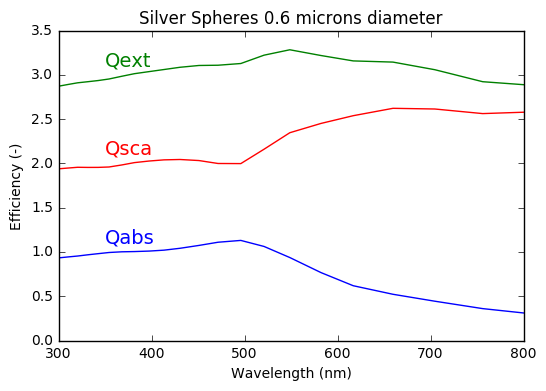

In [13]:
r = 0.3  #radius in microns

x = 2*np.pi*r/ag_lam;
m = ag_mre[i] - 1.0j * ag_mim
qext, qsca, qback, g = mp.mie(m,x)

plt.plot(ag_lam*1000,qext - qsca,color='blue')
plt.plot(ag_lam*1000,qsca,color='red')
plt.plot(ag_lam*1000,qext,color='green')
plt.annotate('Qabs', xy=(350,1.1), color='blue', fontsize=14)
plt.annotate('Qsca', xy=(350,2.1), color='red', fontsize=14)
plt.annotate('Qext', xy=(350,3.1), color='green', fontsize=14)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Efficiency (-)")
plt.title("Silver Spheres 0.6 microns diameter")
plt.xlim(300,800)
plt.show()

# Radiation Pressure

The radiation pressure is given by 
$$
Q_{\hbox{pr}}=Q_{\hbox{ext}}-g Q_{\hbox{sca}}
$$
The pressure exerted on the particle of cross-sectional area $\pi r_0^2$
is
$$
P = {F\over\pi r_0^2} = {Q_{\hbox{ext}}\over c}
$$
were $c$ is the velocity of the radiation in the medium
[Kerker, p. 94].

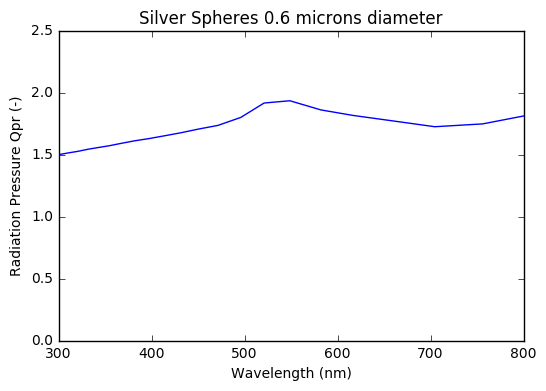

In [14]:
r = 0.3  #radius in microns

x = 2*np.pi*r/ag_lam;
m = ag_mre - 1.0j * ag_mim
qext, qsca, qback, g = mp.mie(m,x)
qpr  = qext - g*qsca

plt.plot(ag_lam*1000,qpr,color='blue')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Radiation Pressure Qpr (-)")
plt.title("Silver Spheres 0.6 microns diameter")
plt.xlim(300,800)
plt.ylim(0,2.5)
plt.show()